## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Change your present working directory

### Load your data file

In [4]:
df = pd.read_csv('daily-minimum-temperatures-in-me.csv')
df.sort_index(inplace=True)
df.head(8)

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4


#### Plot data

In [26]:
df.shape

(3650, 1)

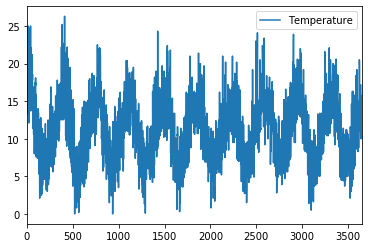

In [9]:
df.plot()

#### Descibe your dataframe

In [6]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [7]:
df.isnull().sum()

Date           0
Temperature    0
dtype: int64

#### Drop null values

In [ ]:
# There aren't any null values

#### Get the representation of the distribution of data in the form of histogram

(array([ 53., 181., 564., 862., 830., 670., 347., 102.,  32.,   9.]),
 array([ 0.  ,  2.63,  5.26,  7.89, 10.52, 13.15, 15.78, 18.41, 21.04,
        23.67, 26.3 ]),
 <a list of 10 Patch objects>)

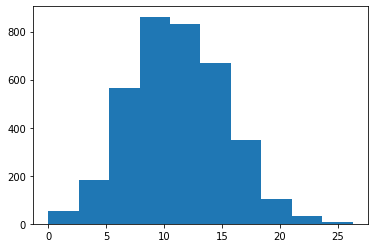

In [12]:
#plt.plot(df['Temperature']
plt.hist(x=df['Temperature'])

#### Check the maximum and minimum values

In [14]:
df['Temperature'].max(), df['Temperature'].min()

(26.3, 0.0)

### Normalize the data

In [15]:
df.drop("Date", axis=1, inplace=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)

#### Check the maximum and minimum values of scaled data

In [23]:
# We have given feature_range as (0, 1). It means min should be 0 & max should be 1
scaled.min(), scaled.max()

(0.0, 1.0)

#### Look into some of the scaled values

In [24]:
scaled[0:5]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

### Split data into Training and Testing

In [28]:
#70% examples will used for training (in the begining)
train_end_index = int(len(scaled) * 0.70)
print('train_end_index : ', train_end_index)

#30% will be used for Test
test_end_index = len(scaled - train_end_index)
print('test_end_index : ', test_end_index)

#Split the data
train, test = scaled[0:train_end_index, :], scaled[train_end_index: len(scaled), :]
print('len train: {}\nlen test: {}'.format(len(train), len(test)))

train_end_index :  2555
test_end_index :  3650
len train: 2555
len test: 1095


#### Print train and test size

In [ ]:
# Printed above

## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [29]:
#window - how long the sequence will be
def create_dataset(dataset, window=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-window):
        
        a = dataset[i:(i+window), 0]        
        dataX.append(a)
        dataY.append(dataset[i + window, 0])
    
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [30]:
window_size = 1
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)

In [31]:
X_train.shape, y_train.shape

((2554, 1), (2554,))

In [32]:
X_test.shape, y_test.shape

((1094, 1), (1094,))

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [33]:
#Make it 3 Dimensional Data - needed for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2554, 1, 1)
(1094, 1, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [34]:
import tensorflow as tf

tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(window_size, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

### Summarize your model

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [36]:
model.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test), batch_size=32)

Train on 2554 samples, validate on 1094 samples
Epoch 1/400
2554/2554 [==============================] - 12s 5ms/sample - loss: 0.1114 - val_loss: 0.0392
Epoch 2/400
2554/2554 [==============================] - 1s 494us/sample - loss: 0.0190 - val_loss: 0.0140
Epoch 3/400
2554/2554 [==============================] - 1s 480us/sample - loss: 0.0147 - val_loss: 0.0132
Epoch 4/400
2554/2554 [==============================] - 1s 483us/sample - loss: 0.0138 - val_loss: 0.0122
Epoch 5/400
2554/2554 [==============================] - 1s 509us/sample - loss: 0.0129 - val_loss: 0.0113
Epoch 6/400
2554/2554 [==============================] - 1s 515us/sample - loss: 0.0121 - val_loss: 0.0105
Epoch 7/400
2554/2554 [==============================] - 1s 503us/sample - loss: 0.0114 - val_loss: 0.0099
Epoch 8/400
2554/2554 [==============================] - 1s 494us/sample - loss: 0.0109 - val_loss: 0.0096
Epoch 9/400
2554/2554 [==============================] - 1s 518us/sample - loss: 0.0105 - val_los

2554/2554 [==============================] - 1s 508us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 77/400
2554/2554 [==============================] - 1s 491us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 78/400
2554/2554 [==============================] - 1s 478us/sample - loss: 0.0100 - val_loss: 0.0086
Epoch 79/400
2554/2554 [==============================] - 1s 488us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 80/400
2554/2554 [==============================] - 1s 480us/sample - loss: 0.0100 - val_loss: 0.0086
Epoch 81/400
2554/2554 [==============================] - 1s 481us/sample - loss: 0.0100 - val_loss: 0.0089
Epoch 82/400
2554/2554 [==============================] - 1s 478us/sample - loss: 0.0101 - val_loss: 0.0087
Epoch 83/400
2554/2554 [==============================] - 1s 491us/sample - loss: 0.0100 - val_loss: 0.0090
Epoch 84/400
2554/2554 [==============================] - 1s 510us/sample - loss: 0.0100 - val_loss: 0.0086
Epoch 85/400
2554/2554 [=================

2554/2554 [==============================] - 1s 520us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 152/400
2554/2554 [==============================] - 1s 563us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 153/400
2554/2554 [==============================] - 2s 594us/sample - loss: 0.0100 - val_loss: 0.0088
Epoch 154/400
2554/2554 [==============================] - 2s 613us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 155/400
2554/2554 [==============================] - 1s 552us/sample - loss: 0.0100 - val_loss: 0.0088
Epoch 156/400
2554/2554 [==============================] - 1s 524us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 157/400
2554/2554 [==============================] - 1s 458us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 158/400
2554/2554 [==============================] - 1s 457us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 159/400
2554/2554 [==============================] - 1s 447us/sample - loss: 0.0100 - val_loss: 0.0088
Epoch 160/400
2554/2554 [========

2554/2554 [==============================] - 1s 526us/sample - loss: 0.0100 - val_loss: 0.0088
Epoch 227/400
2554/2554 [==============================] - 1s 507us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 228/400
2554/2554 [==============================] - 1s 515us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 229/400
2554/2554 [==============================] - 1s 527us/sample - loss: 0.0100 - val_loss: 0.0090
Epoch 230/400
2554/2554 [==============================] - 1s 516us/sample - loss: 0.0099 - val_loss: 0.0087
Epoch 231/400
2554/2554 [==============================] - 1s 545us/sample - loss: 0.0099 - val_loss: 0.0087
Epoch 232/400
2554/2554 [==============================] - 1s 516us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 233/400
2554/2554 [==============================] - 1s 491us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 234/400
2554/2554 [==============================] - 1s 483us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 235/400
2554/2554 [========

2554/2554 [==============================] - 1s 467us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 302/400
2554/2554 [==============================] - 1s 478us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 303/400
2554/2554 [==============================] - 1s 474us/sample - loss: 0.0100 - val_loss: 0.0088
Epoch 304/400
2554/2554 [==============================] - 1s 539us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 305/400
2554/2554 [==============================] - 1s 540us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 306/400
2554/2554 [==============================] - 1s 450us/sample - loss: 0.0100 - val_loss: 0.0088
Epoch 307/400
2554/2554 [==============================] - 1s 457us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 308/400
2554/2554 [==============================] - 1s 511us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 309/400
2554/2554 [==============================] - 1s 571us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 310/400
2554/2554 [========

2554/2554 [==============================] - 2s 588us/sample - loss: 0.0100 - val_loss: 0.0088
Epoch 377/400
2554/2554 [==============================] - 1s 528us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 378/400
2554/2554 [==============================] - 1s 524us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 379/400
2554/2554 [==============================] - 1s 558us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 380/400
2554/2554 [==============================] - 1s 539us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 381/400
2554/2554 [==============================] - 2s 607us/sample - loss: 0.0099 - val_loss: 0.0087
Epoch 382/400
2554/2554 [==============================] - 1s 552us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 383/400
2554/2554 [==============================] - 1s 529us/sample - loss: 0.0100 - val_loss: 0.0087
Epoch 384/400
2554/2554 [==============================] - 1s 574us/sample - loss: 0.0100 - val_loss: 0.0088
Epoch 385/400
2554/2554 [========

## Make Predictions and Evaluate your model

In [37]:
#Get prediction for both Training and Test Data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

## Plot the results

In [38]:
#Un-normalize the predited data
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [39]:
import matplotlib.pyplot as plt

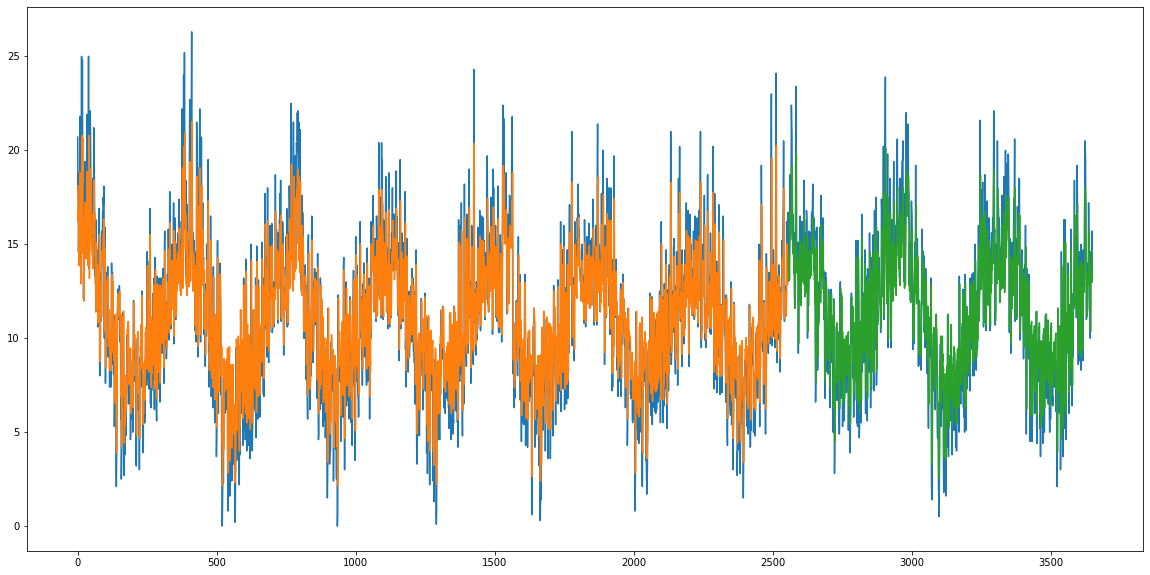

In [42]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2):len(scaled), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()